# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following  algorithms: **Decision Tree**, **Random Forest** and **Gradient Boosted Tree**, i.e. a total of 3 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



# Data Pre-Processing:

In [13]:
# Common library imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.preprocessing import StandardScaler

In [14]:
# Data pre-processing
## We base our pre-processing on the raw alldata.xlsx information, which includes a complete overview of all the responses associated with each candidate and party affiliation.
raw_data = pd.read_excel('alldata.xlsx')

## Display the head of the raw data, for visual inspection:
display(raw_data.head())

## Since it is a requirement that each party have a specific color, I create a dictionary here, with these colors defined:
party_colors = {
    "Socialdemokratiet": "#b32722",
    "Radikale Venstre": "#713280",
    "Det Konservative Folkeparti": "#9eba27",
    "Nye Borgerlige": "#054f5c",
    "Socialistisk Folkeparti": "#dd0878",
    "Liberal Alliance": "#21c6cf",
    "Kristendemokraterne": "#bababa",
    "Moderaterne": "#6c39e5",
    "Dansk Folkeparti": "#f3cd41",
    "Frie Grønne, Danmarks Nye Venstrefløjsparti": "#00e66a",
    "Venstre": "#006697",
    "Danmarksdemokraterne": "#8ac3ff",
    "Enhedslisten": "#ed8019",
    "Alternativet": "#2a8f39",
    "Løsgænger": "#8c564b"
}

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58


# Data Analysis: Age of Candidates grouped by party

Age stats grouped by party:


,count,min,max,mean,std,mode,25%,50%,75%
parti,,,,,,,,,
Alternativet,65.0,21.0,79.0,47.415385,13.620862,50,39.00,48.0,58.00
Danmarksdemokraterne,37.0,24.0,69.0,51.216216,10.252737,40,45.00,53.0,59.00
Dansk Folkeparti,49.0,20.0,75.0,45.530612,12.191360,42,39.00,47.0,54.00
Det Konservative Folkeparti,94.0,20.0,66.0,44.723404,11.904101,53,37.00,48.0,53.00
Enhedslisten,71.0,19.0,74.0,42.225352,15.193229,35,31.00,41.0,53.50
"Frie Grønne, Danmarks Nye Venstrefløjsparti",26.0,20.0,62.0,34.807692,10.777826,26,27.50,33.0,37.50
Kristendemokraterne,41.0,21.0,73.0,50.219512,13.441563,47,43.00,50.0,61.00
Liberal Alliance,68.0,18.0,72.0,37.970588,13.736291,32,26.00,37.0,46.00
Løsgænger,3.0,40.0,58.0,48.000000,9.165151,40,43.00,46.0,52.00


Age distribution visualized


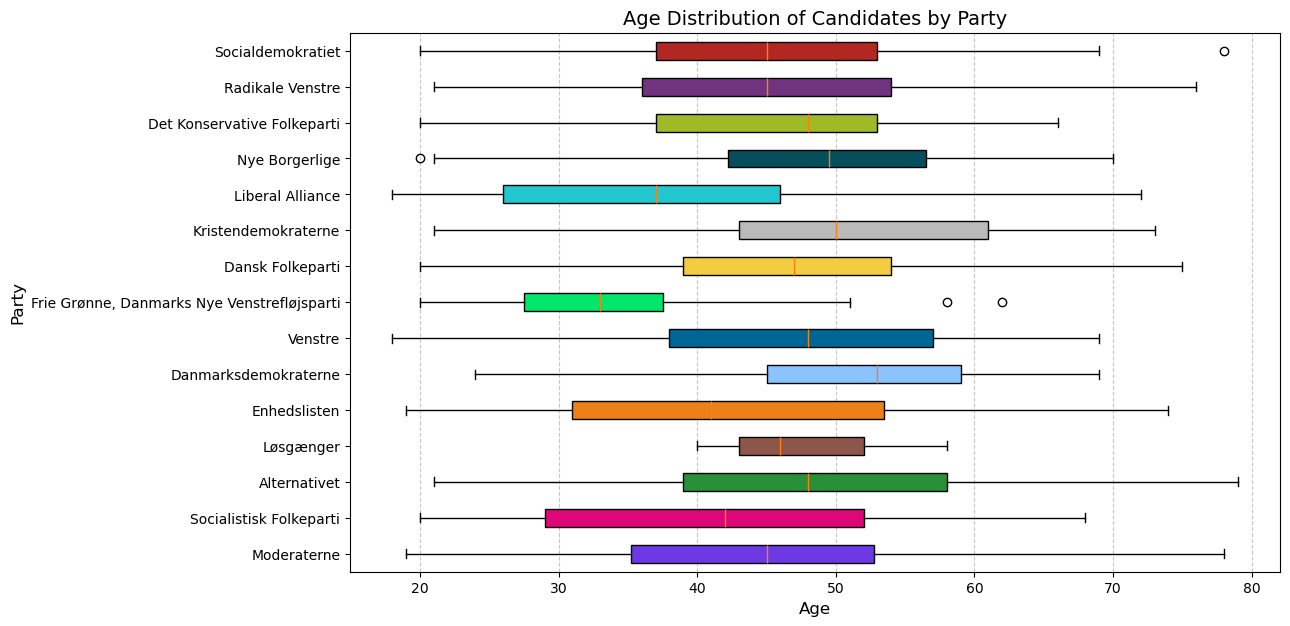

In [21]:
# Data analysis: Age of Candidates grouped by party

## Extract the relevant columns, these being party affiliation and candidate age.
age_data = raw_data[['parti', 'alder']]
#display(age_data)
# 867 entries found

## Note: Some candidates have not given their age! These should (must be) excluded from the data set to avoid skewing the data.
## Thus we need to clean up the data. We remove candidates that have not given their age (ages set to 0)
age_data_cleaned = age_data.loc[age_data['alder'] != 0]
# display(age_data_cleaned)
# 851 entries remaining.

## We now begin our analysis of the candidates grouped by party.
## We are interested in analysing for each party what are the: Max age, Min Age, Median/Average Age, Standard age deviation, age medians across quartiles of the dataset (25%, 50%, 75%) and the most frequently occurring (mode) age.
age_data_cleaned_groupedByParty = age_data_cleaned.groupby(['parti'])

## Compute the mean, std, min., max., 25%, 50% and 75% quartiles.
age_data_stats = age_data_cleaned_groupedByParty['alder'].describe()

## Calculate the mode values:
mode_values = age_data_cleaned_groupedByParty['alder'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
mode_values = mode_values.rename("mode")
age_data_stats = age_data_stats.join(mode_values)

## Arrange the columns in my preferred order: number_of_candidates, min. age, max. age, mean age, standard age deviation, age mode and data for each quartile.
column_order = ['count', 'min', 'max', 'mean', 'std', 'mode', '25%', '50%', '75%']
age_data_stats = age_data_stats[column_order]

print("Age stats grouped by party:")
display(age_data_stats)

print("Age distribution visualized")
parties = age_data_cleaned['parti'].unique()
data = [age_data_cleaned.loc[age_data_cleaned['parti'] == party, 'alder'] for party in parties]

plt.figure(figsize=(12, 7))
box = plt.boxplot(data, vert=False, patch_artist=True, tick_labels=parties)

for patch, label in zip(box['boxes'], parties):
    color = party_colors.get(label, "#7f7f7f")
    patch.set_facecolor(color)

plt.xlabel("Age", fontsize=12)
plt.ylabel("Party", fontsize=12)
plt.title("Age Distribution of Candidates by Party", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


# Data Analysis: Candidate Confidence

In [16]:
# Insert code

# Most confident candidates... Count most occurances of +2 or -2.

# Data Analysis: Candidate response differences inter-party and intra-party

In [17]:
# Insert code

# Machine Learning: Decision Tree, Random Forest & Gradient Boosted Tree models to predict Candidate party affiliation

In [18]:
# Insert code